# PROJECT 1 - FIRST NOTEBOOK 

**Table of Content** 

1. Business Understanding
2. Data Understanding
3. Data Preparation


The main objective of this notebook is to represent the current status of the Maintenance & Repair division from the OGC (Oil, Gas and Chemicals) business line in SGS Chile, seeking to identify the main variables and the type of data that compose them, in order to extract preliminary information. 

[SGS](https://www.sgs.cl/en/) is one of the world's leading inspection, verification, testing and certification company. In Chile, the company is divided in four branches: SGS Chile, SGS Minerals, SGS Siga and SGS Academy; where each one of them is in charge of executing specific process and services. 

In order to achieve this purpose, the first three stages of the CRISP-DM methodology will be applied.The final result will be a clean database, that will be ready to be processed.

Due to the company policy and because it is real data, the information used here is two years old.

# I. Business Understanding

The scope of this project will be reduced only to the Maintenance & Repair (M&R) division which belongs to the Oil, Gas and Chemicals business line (OGC)

In [144]:
# Import libraries
import pickle, datetime, numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import Image
%matplotlib inline
#pd.reset_option('^display.', silent=True)

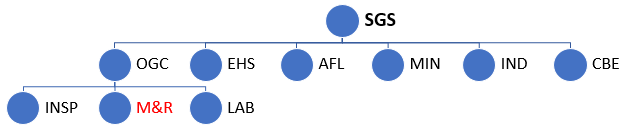

In [145]:
# The Maintenance & Repair (M&R) division in SGS Chile
Image(filename='images/OGC_SGS.png', width=600, height=600)

The Maintenance & Repair (M&R) area is responsible for carrying out repairs, adjustments, installations and tests to the different components and equipment at the many service stations that are associated to the OGC business line, mostly gas stations.

To ensure proper control of activities, the M&R section uses a database that collects the details of each tasks performed by the workers.

In [146]:
# Import Data Frame 
df = pd.read_excel("List_Report_Gestion_30082019061320.xls")
df.head()

,Recepción OT,Hora Recep.,OT,Estacion,Tipo Estación,Ubicación Técnica,Origen del Servicio,Region,Prioridad SGS,Prioridad Cliente,...,Repuesto,Cnt,Monto,Total,Ltr 93,Ltr 95,Ltr 97,Ltr D,Ltr K,Ind. Gestion
0,30/08/2019,17:18:00,3008190033,Buses Metropolitana,PUNTO INDUSTRIAL,2256194,Contrato Fuel System Enex,13°,Normal 24 Horas,Normal 24 Horas,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
1,30/08/2019,17:17:00,3008190024,INVERSIONES INGERIASUR LTDA.,ESTACION DE SERVICIO,359,Contrato Fuel System Enex,9°,Normal 24 Horas,Normal 24 Horas,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
2,30/08/2019,16:52:00,2606190074,Tingaro Spa.,ESTACION DE SERVICIO,553,Contrato Fuel System Enex,13°,Normal 48 Horas,Normal 48 Horas,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
3,30/08/2019,16:49:00,3008190043,INVERSIONES GLOBAL LIMITADA,ESTACION DE SERVICIO,660,Contrato Fuel System Enex,9°,Normal 24 Horas,Normal 24 Horas,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
4,30/08/2019,16:48:00,2908190028,Comercial Antuco Ltda.,ESTACION DE SERVICIO,680,Contrato Fuel System Enex,5°,Normal 24 Horas,Normal 24 Horas,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN


In [147]:
# Shape of the DF
df.shape

(23258, 34)

In [148]:
# Get column names
df.columns

Index(['Recepción OT', 'Hora Recep.', 'OT', 'Estacion', 'Tipo Estación',
       'Ubicación Técnica', 'Origen del Servicio', 'Region', 'Prioridad SGS',
       'Prioridad Cliente', 'Tecnico Asignado', 'Estado OT', 'Condición',
       'Tipo de Falla', 'Observación', 'Requerimiento', 'Técnico Cierre',
       'TDR', 'TDS', 'Fecha Arribo', 'Hora Arribo', 'Fecha Cierre',
       'Hora Cierre', 'Cod. Repuesto', 'Repuesto', 'Cnt', 'Monto', 'Total',
       'Ltr 93', 'Ltr 95', 'Ltr 97', 'Ltr D', 'Ltr K', 'Ind. Gestion'],
      dtype='object')

To get a better undestanding about what the data means in *df_total*, the general process behind each record is described below:

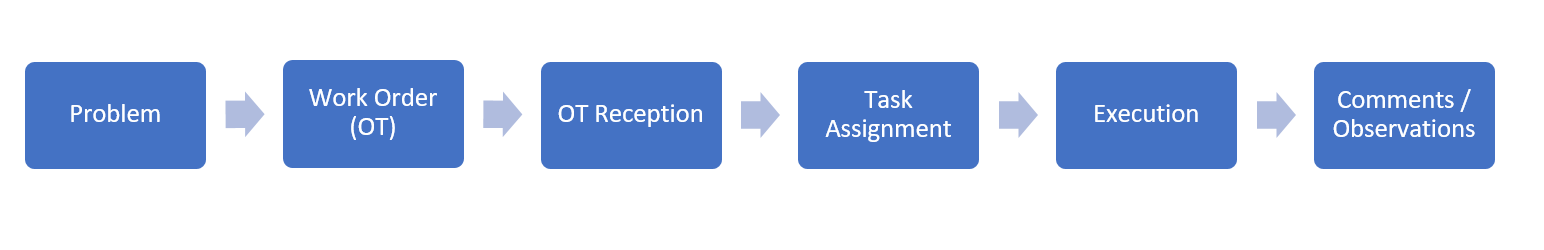

In [149]:
# Task flow in M&R
Image(filename='images/MYR_TASKFLOW.png', width=800, height=800)

1. Problem: Service stations detect a problem or they noticed that maintenance is needed
2. Work Order (OT): Because of the requirement, a work order (Órden de Trabajo in Spanish) is issued to M&R
3. OT Reception: M&R analyze and prioritize the OT
4. Task Assignment: A qualified technician is chosen for working on the task according to his availability
5. Execution: Time the worker spends on the task
6. Comments/Observations: Brief description of the task and what was done. The technician must do this step

In order to get a better understanding of the data, we will analyze the table based on three main questions 

<div class="alert alert-success" style="margin: 20px">
<b>Business Questions: </b><br>
    1.- What are the periods when M&R receives the most number of work orders (OT)? Is there a peak?<br>
    2.- How long does it take to attend the requests? and how much time does a worker spend fixing the issues?<br>
    3.- What are the most common type of failures or issues that require attention?  
</div>

In [150]:
# Questions
# 1.- Rango de horas y dias
# 2.- Estaciones más solicitdas, región y nombre de técnicos
# 3.- Extraer info de los campos de texto no estructurados

In [151]:
# Questions
# 1.- Cantidad de OT por periodos de tiempo
# 2.- Tiempos de trabajo 
# 3.- Tipos de falla más comunes (Por Estación, Region, y trabajador)

# II. Data Understanding

In [152]:
df.shape

(23258, 34)

The following is a brief description of each of the df_total columns

In [153]:
# Schema
schema = pd.read_excel("Data_Schema.xls")
schema

,Columna,Descripción,Desc_Translated
0,Recepción OT,Fecha en que la OT ingresa al sistema,Date the OT enters the system
1,Hora Recep.,Hora en que la OT ingresa al sistema,Time the OT enters the system
2,OT,Código de OT,OT Code
3,Estacion,Nombre de estación de servicio,Service station name
4,Tipo Estación,desc_translated,Type of service station
5,Ubicación Técnica,Localización de la estación de servicio,Service Station Location
6,Origen del Servicio,Rubro de la estación,Field of the station
7,Region,Región geográfica en donde está la estación,Geographic region where the station is located
8,Prioridad SGS,Nivel de urgencia de la OT de acuerdo a M&R,OT urgency level according to M&R
9,Prioridad Cliente,Nivel de urgencia de la OT de acuerdo al cliente,OT urgency level according to the client


In [154]:
# Percentage of nulls values
df.isnull().mean()

Recepción OT           0.000000
Hora Recep.            0.000000
OT                     0.044888
Estacion               0.000000
Tipo Estación          0.113681
Ubicación Técnica      0.000000
Origen del Servicio    0.000000
Region                 0.000000
Prioridad SGS          0.309012
Prioridad Cliente      0.000000
Tecnico Asignado       0.000000
Estado OT              0.000000
Condición              0.000000
Tipo de Falla          0.000000
Observación            0.060968
Requerimiento          0.000000
Técnico Cierre         0.000000
TDR                    0.000000
TDS                    0.000000
Fecha Arribo           0.068020
Hora Arribo            0.068020
Fecha Cierre           0.083971
Hora Cierre            0.083971
Cod. Repuesto          1.000000
Repuesto               1.000000
Cnt                    1.000000
Monto                  1.000000
Total                  1.000000
Ltr 93                 0.000000
Ltr 95                 0.000000
Ltr 97                 0.000000
Ltr D   

In [155]:
# Unique values
for col in df.columns:
    print(f"{col:20} {len(df[col].unique()):7}")

Recepción OT             350
Hora Recep.              768
OT                     22208
Estacion                1007
Tipo Estación              3
Ubicación Técnica       1164
Origen del Servicio        8
Region                    15
Prioridad SGS             15
Prioridad Cliente         14
Tecnico Asignado          79
Estado OT                  4
Condición                 12
Tipo de Falla             66
Observación            18516
Requerimiento          17070
Técnico Cierre            75
TDR                     8991
TDS                    10379
Fecha Arribo             462
Hora Arribo             1289
Fecha Cierre             455
Hora Cierre             1231
Cod. Repuesto              1
Repuesto                   1
Cnt                        1
Monto                      1
Total                      1
Ltr 93                   434
Ltr 95                   262
Ltr 97                   346
Ltr D                    394
Ltr K                    104
Ind. Gestion               4


In [156]:
# Categorical columns
cat_df = df.select_dtypes(include=['object'])
cat_df.columns

Index(['Recepción OT', 'Hora Recep.', 'OT', 'Estacion', 'Tipo Estación',
       'Ubicación Técnica', 'Origen del Servicio', 'Region', 'Prioridad SGS',
       'Prioridad Cliente', 'Tecnico Asignado', 'Estado OT', 'Condición',
       'Tipo de Falla', 'Observación', 'Requerimiento', 'Técnico Cierre',
       'Fecha Arribo', 'Hora Arribo', 'Fecha Cierre', 'Hora Cierre',
       'Ind. Gestion'],
      dtype='object')

### Main columns

Region - Unique values: 15
Counter({'13°': 9661, '8°': 2677, '5°': 2127, '10°': 1521, '9°': 1475, '7°': 1174, '6°': 941, '4°': 861, '2°': 838, '14°': 624, '3°': 394, '1°': 392, '12°': 277, '15°': 169, '11°': 127})


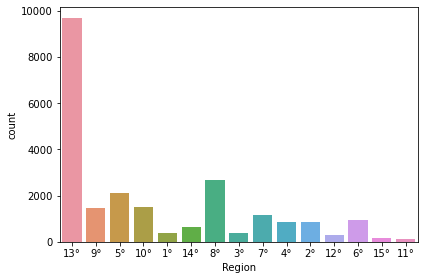

In [157]:
# Region
print((f"\033[1mRegion - Unique values: {len(sorted(df['Region'].unique()))}\033[0m")) # Region - unique values
region_total = Counter(df["Region"]) # Number of OT per Region
print(region_total)

sns.countplot(x='Region',data=df, );

Estacion - Unique values: 1007
[('OPERACIONES Y SERVICIOS TERPEL LTDA.', 923), ('INVERSIONES ENEX S.A.', 429), ('SOCIEDAD DE COMBUSTIBLES AUSTRAL LTDA.', 159), ('CL - Buses Vule S.A.', 152), ('Petrobras Chile Red Ltda. Salida Norte', 118), ('Petrobras Chile Red Ltda- Enea', 117), ('SOCIEDAD COMERCIAL ANTUCO LTDA.', 115), ('Comercial Albano Ltda.', 108), ('Distribuidora de Combustibles Saavedra y Otro Ltda.', 105), ('DIGESA LTDA.', 105)]


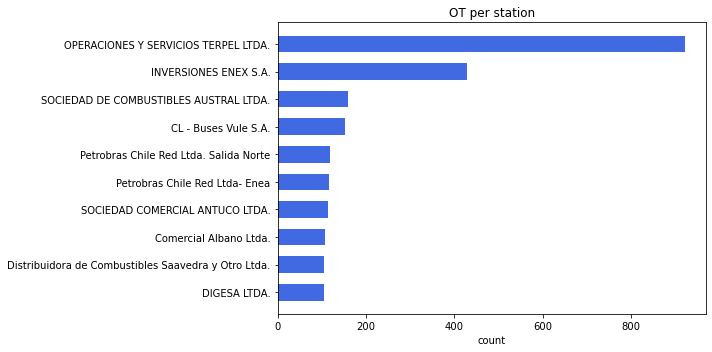

In [158]:
# Estacion - Station
print((f"\033[1mEstacion - Unique values: {len(sorted(df['Estacion'].unique()))}\033[0m"))
estacion_total= Counter(df["Estacion"])
print(estacion_total.most_common(10)) # Top 10 stations with most OT

dic_est_total = estacion_total.most_common(10)
keys_est_total = [i for i,v in dic_est_total][::-1]
values_est_total = [v for i,v in dic_est_total][::-1]

plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams.update({'figure.autolayout': True})
plt.barh(keys_est_total,values_est_total, align = 'center', color = 'royalblue', height = 0.6)
plt.title("OT per station")
plt.xlabel("count")
plt.show()

Tipos de Falla - Unique values: 66


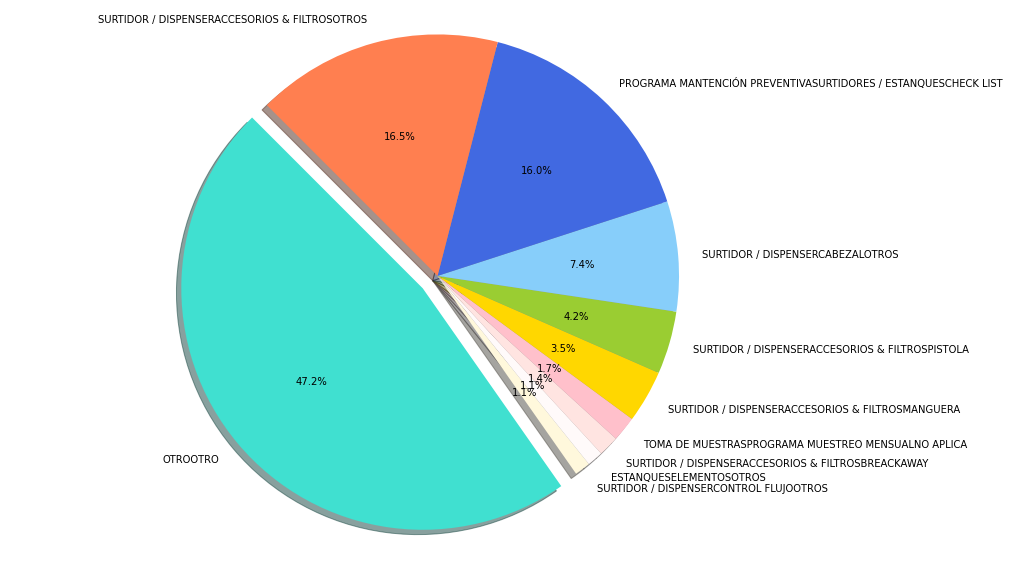

In [159]:
# Tipo de Falla - Type of failure
print((f"\033[1mTipos de Falla - Unique values: {len(sorted(df['Tipo de Falla'].unique()))}\033[0m"))
colors = ['cornsilk','snow', 'mistyrose','pink','gold', 'yellowgreen', 'lightskyblue','royalblue','coral','turquoise']
explode = (0,0,0,0,0, 0, 0, 0, 0, 0.08)  # explode 1st slice
plt.rcParams['figure.figsize'] = [14,8] 
plt.rcParams.update({'figure.autolayout': True})

tfalla_total = Counter(df["Tipo de Falla"])
dic_tfallatotal = tfalla_total.most_common(10)
    
keys = [i for i,v in dic_tfallatotal][::-1]
values = [v for i,v in dic_tfallatotal][::-1]

plt.pie(values,explode = explode, labels = keys, colors = colors,autopct='%1.1f%%', shadow=True, startangle=305)
plt.axis('equal')
plt.show()

In [160]:
# Tipo de Falla - Proportion
pd.DataFrame(df['Tipo de Falla'].value_counts()/ df['Tipo de Falla'].shape[0])

,Tipo de Falla
OTROOTRO,0.437269
SURTIDOR / DISPENSERACCESORIOS & FILTROSOTROS,0.152808
PROGRAMA MANTENCIÓN PREVENTIVASURTIDORES / ESTANQUESCHECK LIST,0.148121
SURTIDOR / DISPENSERCABEZALOTROS,0.068149
SURTIDOR / DISPENSERACCESORIOS & FILTROSPISTOLA,0.038954
...,...
SURTIDOR / DISPENSERELEMENTOSRETRACTIL,0.000043
SURTIDOR / DISPENSERCONTROL FLUJOVALVULA SOLENOIDE / DIGITAL,0.000043
SURTIDOR / DISPENSERMEDIDORVALVULA DE RETENCIÒN,0.000043
SURTIDOR / DISPENSERCABEZALCABLES ELECTRICOS,0.000043


In [161]:
# Observaciones - Observations
df['Observación'][100]

'Brakaway cortado era convencional  Cambio de brakaway 3/4 reconectable boca 3 de 95 el cual se corto y era convencional. Equipo operativo'

In [162]:
# Requerimientos - Requirement 
df['Requerimiento'][100]

'Area de Atención : En isla Nº 1 boca 3 gasolina 95 manguera  y pistola se salio  del dispensador sin venta isla Nº 1  Solicitado por: Norma Rivera Friz Fono: 82042508'

# III. Data Preparation

For the purpose of solving the business questions, first it is necessary to pre-process the data

<div class="alert alert-success" style="margin: 20px">
<b>Business Questions: </b><br>
    1.- What are the periods when M&R receives the most number of work orders (OT)? Is there a peak?<br>
    2.- How long does it take to attend the requests? and how much time does a worker spend fixing the issues?<br>
    3.- What are the most common type of failures or issues that require attention?  
</div>

### 1. What are the periods when M&R receives the most number of work orders (OT)? Is there a peak?

In [163]:
# Generating a day interval function
def days_interval(row):
    if row == 0: 
        return '0 - 24 hrs'
    elif row == 1:
        return '1 - 2 days'
    elif row == 2:
        return '2 - 3 days'
    elif row == 3: 
        return '3 - 4 days'
    elif row == 4: 
        return '4 - 5 days'
    elif row == 5: 
        return '5 - 6 days'
    elif row == 6: 
        return '6 - 7 days'
    elif row>= 7 and row <= 14: 
        return '1 - 2 weeks'
    elif row>14 and row <= 21: 
        return '2 - 3 weeks'
    elif row>21 and row <= 31: 
        return '3 - 4 weeks'
    else:
        if row>0:
            return '+ 1 month'
        else: 
            return 'Date Error' 
        
# Generating an hour interval function        
def hours_interval(row):
    if row == 0: 
        return 'Less 1 hrs'
    elif row == 1:
        return '1 - 2 hrs'
    elif row == 2:
        return '2 - 3 hrs'
    elif row == 3: 
        return '3 - 4 hrs'
    elif row == 4: 
        return '4 - 5 hrs'
    elif row == 5: 
        return '5 - 6 hrs'
    elif row == 6: 
        return '6 - 7 hrs'
    elif row == 7: 
        return '7 - 8 hrs'
    elif row>=8 and row <= 24: 
        return '8 - 24 hrs'
    elif row>24 and row <= 72: 
        return '1 - 3 days'
    elif row>72 and row <= 168: 
        return '3 - 7 days'
    elif row>168 and row <= 730: 
        return '1 - 4 weeks'
    else:
        if row>0:
            return '+ 1 month'
        else: 
            return 'Time Error'

In [164]:
# Function to extract info from dates and times
def df_date_time(df):
    '''
    INPUT
    - The original Data Frame
    
    OUTPUT
    - Data Frame with time intervals
    '''
    
    d_months = {1:'JAN',2:'FEB',3:'MAR',4:'APR',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'}
   
    df['Reception'] = pd.to_datetime((df['Recepción OT'] + ' ' +  df['Hora Recep.']), dayfirst= True)  
    df['Arrival'] = pd.to_datetime((df['Fecha Arribo'] + ' ' +  df['Hora Arribo']), dayfirst= True) 
    df['Departure'] = pd.to_datetime((df['Fecha Cierre'] + ' ' +  df['Hora Cierre']), dayfirst= True)
    df['Recepción OT'] = pd.to_datetime(df['Recepción OT'], dayfirst= True, format = '%d/%m/%Y')
    df['Hora Recep.']= pd.to_datetime(df['Hora Recep.'])

    df['Day'] =  (df[['Recepción OT']].apply(lambda x: datetime.datetime.strftime(x['Recepción OT'], '%A'), axis=1))
    df['N Day'] = df['Recepción OT'].dt.day
    df['Month'] = (df['Recepción OT'].dt.month).apply(lambda x: d_months[x]) +' '+ (df[['Recepción OT']].apply(lambda x: datetime.datetime.strftime(x['Recepción OT'], '%y'), axis=1))
    df['Hour'] = df['Hora Recep.'].dt.hour

    def days_hours_minutes(td):
        return td.days, td.seconds//3600, (td.seconds//60)%60
    def hours_timestamp(td):
        from math import floor
        return (td.days*24)+(td.seconds//3600)

    df['Time Reception/Arrival'] = (df['Arrival'] - df['Reception']).dt.days
    df['Time Arrival/Departure'] = (df['Departure'] - df['Arrival']).apply(hours_timestamp)
    df['Interval Recep/Arrival'] = df['Time Reception/Arrival'].apply(days_interval)
    df['Interval Arrival/Landing'] = df['Time Arrival/Departure'].apply(hours_interval)
    
    return df


In [165]:
df2 = df_date_time(df.copy())
df2.head()

,Recepción OT,Hora Recep.,OT,Estacion,Tipo Estación,Ubicación Técnica,Origen del Servicio,Region,Prioridad SGS,Prioridad Cliente,...,Arrival,Departure,Day,N Day,Month,Hour,Time Reception/Arrival,Time Arrival/Departure,Interval Recep/Arrival,Interval Arrival/Landing
0,2019-08-30,2021-05-04 17:18:00,3008190033,Buses Metropolitana,PUNTO INDUSTRIAL,2256194,Contrato Fuel System Enex,13°,Normal 24 Horas,Normal 24 Horas,...,NaT,NaT,Friday,30,AUG 19,17,NaN,NaN,Date Error,Time Error
1,2019-08-30,2021-05-04 17:17:00,3008190024,INVERSIONES INGERIASUR LTDA.,ESTACION DE SERVICIO,359,Contrato Fuel System Enex,9°,Normal 24 Horas,Normal 24 Horas,...,NaT,NaT,Friday,30,AUG 19,17,NaN,NaN,Date Error,Time Error
2,2019-08-30,2021-05-04 16:52:00,2606190074,Tingaro Spa.,ESTACION DE SERVICIO,553,Contrato Fuel System Enex,13°,Normal 48 Horas,Normal 48 Horas,...,2019-06-27 09:00:00,2019-08-28 17:00:00,Friday,30,AUG 19,16,-65.0,1496.0,Date Error,+ 1 month
3,2019-08-30,2021-05-04 16:49:00,3008190043,INVERSIONES GLOBAL LIMITADA,ESTACION DE SERVICIO,660,Contrato Fuel System Enex,9°,Normal 24 Horas,Normal 24 Horas,...,NaT,NaT,Friday,30,AUG 19,16,NaN,NaN,Date Error,Time Error
4,2019-08-30,2021-05-04 16:48:00,2908190028,Comercial Antuco Ltda.,ESTACION DE SERVICIO,680,Contrato Fuel System Enex,5°,Normal 24 Horas,Normal 24 Horas,...,2019-08-29 12:50:00,NaT,Friday,30,AUG 19,16,-2.0,NaN,Date Error,Time Error


In [166]:
# Function to check the OT evolution over time

def OT_timeline(df, c = 'lightskyblue', figsize = [15,9]):
    '''
    INPUT
    - Data Frame with time intervals 
    - Color
    - Figsize
    
    OUTPUT
    - Figure with four subplots (OT per Month, OT per Day, OT per Day of Week and OT per Hour)
    
    '''
    
    plt.figure(1)
    plt.rcParams['figure.figsize'] = figsize
    meses = Counter(df["Month"]) # Cantidad de mantenciones por mes
    plt.subplot(221)
    mi = ['JUL 18','AUG 18','SEP 18','OCT 18','NOV 18','DEC 18','JAN 19','FEB 19','MAR 19','APR 19','MAY 19','JUN 19','JUL 19', 'AUG 19']
    mv = [meses[i] for i in mi]
    plt.plot(mi, mv, color = c, marker = 'o')
    plt.title("OT per Month", fontweight= 'bold', fontsize = 10)
    plt.ylabel('count')
    plt.xticks(rotation=30)

    # -----------------------------------------------------------
    plt.subplot(222)
    n_dias = Counter(df['N Day']) # Cantidad de mantenciones por número de dias
    d4 = n_dias.most_common(31)
    ni = [i for i,v in d4][::-1]
    nv = [v for i,v in d4][::-1]
    plt.bar(ni, nv, align='center', color = c)
    plt.title("OT per Day",fontweight= 'bold', fontsize = 10)
    plt.ylabel('count')
    plt.xlabel('Day')
    plt.xticks(range(1,32))

    # -----------------------------------------------------------
    plt.subplot(223)
    dias = Counter(df["Day"]) # Cantidad de mantenciones por dia
    di = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    dv = [dias[i] for i in di]
    plt.plot(di, dv, color = c, marker = 'o')
    plt.title("OT per Day of Week",fontweight= 'bold', fontsize = 10)
    plt.ylabel('count')
    plt.xticks(rotation=0)

    # -----------------------------------------------------------
    plt.subplot(224)
    horas = Counter(df["Hour"]) # Cantidad de mantenciones por rango de hora
    d3 = horas.most_common(30)
    hi = [i for i,v in d3][::-1]
    hv = [v for i,v in d3][::-1]
    plt.bar(hi, hv, align='center', color = c)
    plt.title("OT per Hour",fontweight= 'bold', fontsize = 10)
    plt.xlabel('Hour')
    plt.ylabel('count')
    plt.xticks(range(0,24))
    
    plt.tight_layout()

In [167]:
def col_perc_values(col):
    '''It returns the proportion of a value in a column'''
    return col.value_counts()/col.shape[0]

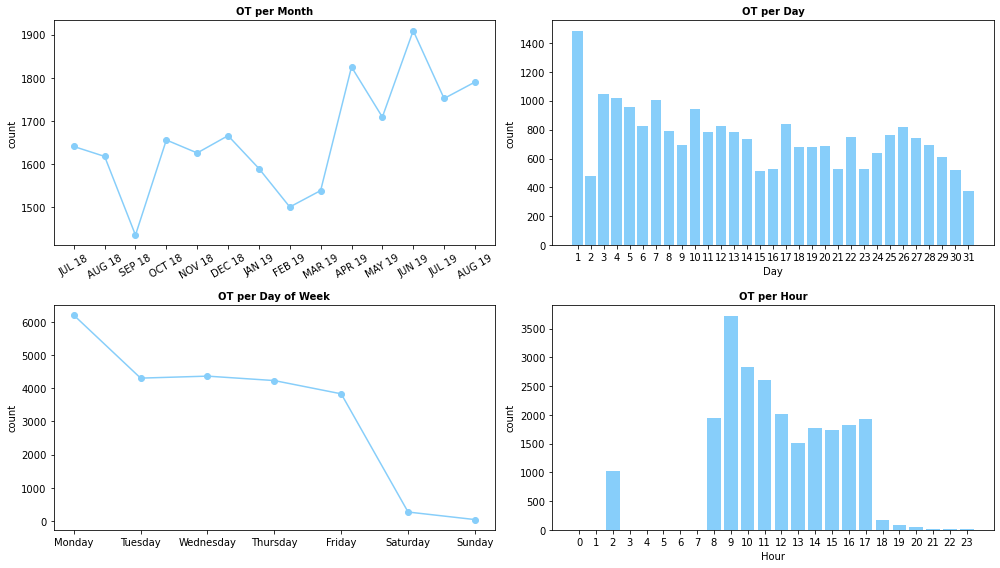

In [168]:
OT_timeline(df2)

In [169]:
col_perc_values(df2['Month'])

JUN 19    0.082079
APR 19    0.078468
AUG 19    0.076963
JUL 19    0.075329
MAY 19    0.073480
DEC 18    0.071631
OCT 18    0.071201
JUL 18    0.070556
NOV 18    0.069911
AUG 18    0.069567
JAN 19    0.068364
MAR 19    0.066171
FEB 19    0.064537
SEP 18    0.061742
Name: Month, dtype: float64

In [170]:
col_perc_values(df2['N Day'])

1     0.063677
3     0.045060
4     0.043684
7     0.043297
5     0.041190
10    0.040631
17    0.036031
12    0.035601
6     0.035515
26    0.035128
8     0.033838
11    0.033623
13    0.033580
25    0.032763
22    0.032333
27    0.031946
14    0.031731
9     0.029925
28    0.029753
20    0.029452
19    0.029323
18    0.029280
24    0.027560
29    0.026228
23    0.022659
21    0.022616
16    0.022573
30    0.022272
15    0.022100
2     0.020509
31    0.016123
Name: N Day, dtype: float64

In [171]:
col_perc_values(df2['Day'])

Monday       0.267005
Wednesday    0.187806
Tuesday      0.185227
Thursday     0.182045
Friday       0.164847
Saturday     0.011437
Sunday       0.001634
Name: Day, dtype: float64

In [172]:
col_perc_values(df2['Hour'])

9     0.160246
10    0.121980
11    0.111832
12    0.086379
8     0.083670
17    0.083197
16    0.078124
14    0.076146
15    0.074641
13    0.064709
2     0.044243
18    0.007610
19    0.003784
20    0.001935
23    0.000602
21    0.000473
22    0.000344
1     0.000043
0     0.000043
Name: Hour, dtype: float64

<div class="alert alert-success" style="margin: 20px">
<b>Business Questions: </b><br>
    1.- What are the periods when M&R receives the most number of work orders (OT)? Is there a peak?<br>
    
Looking at the charts from above we can say that:
    
a) The OT started to become more frequent from April 2019 onwards. On June 2019 was the peak and the lowest point was on September 2018, in part because on this month Chile had its national holidays.<br>
    
b) There is a slight tendency that the number of OT are higher at the beginning of the month, as the first 10 days accumulate 40% of the total.<br>

c) Mondays are the day when M&R recieved the mosth amount of orders (27% counting the whole week).<br>
    
d) Usually the work orders are received in the morning (beforne 12pm).<br>
    
</div>

### 2. How long does it take to attend the requests? and how much time does a worker spend fixing the issues?

In [173]:
# Function to check how long does it take to attend the requests

def work_time(df, c = 'lightgray', figsize = [15,9]):
    '''
    INPUT
    - Data Frame with time intervals 
    - Color
    - Figsize
    
    OUTPUT
    - Figure with two subplots showing the Time Reception OT / Arrival worker and Time Arrival/Departure of the worker
    
    '''
    plt.figure(1)
    
    plt.subplot(211)
    recep_arrival = Counter(df['Interval Recep/Arrival'])
    range_di = ['0 - 24 hrs', '1 - 2 days', '2 - 3 days','3 - 4 days','4 - 5 days','5 - 6 days','6 - 7 days', '1 - 2 weeks',
               '2 - 3 weeks','3 - 4 weeks','+ 1 month','Date Error']
    range_dv = [recep_arrival[i] for i in range_di]

    plt.plot(range_di, range_dv, color = c, marker = 'o')
    plt.title("Time Reception OT / Arrival worker",fontweight= 'bold', fontsize = 10)
    plt.ylabel('Count')
    plt.xticks(rotation=50)

    # -----------------------------------------------------------
    plt.subplot(212)
    arrival_dep = Counter(df['Interval Arrival/Landing'])
    range_hi = ['Less 1 hrs', '1 - 2 hrs','2 - 3 hrs','3 - 4 hrs','4 - 5 hrs','5 - 6 hrs','6 - 7 hrs',
              '7 - 8 hrs','8 - 24 hrs','1 - 3 days','3 - 7 days','1 - 4 weeks','+ 1 month','Time Error']
    range_hv = [arrival_dep[i] for i in range_hi]


    plt.bar(range_hi, range_hv, color = c, align='center', width = 0.6)
    plt.title("Time Arrival / Departure worker",fontweight= 'bold', fontsize = 10)
    plt.ylabel('Count')
    plt.xticks(rotation=50)
    
    plt.tight_layout()

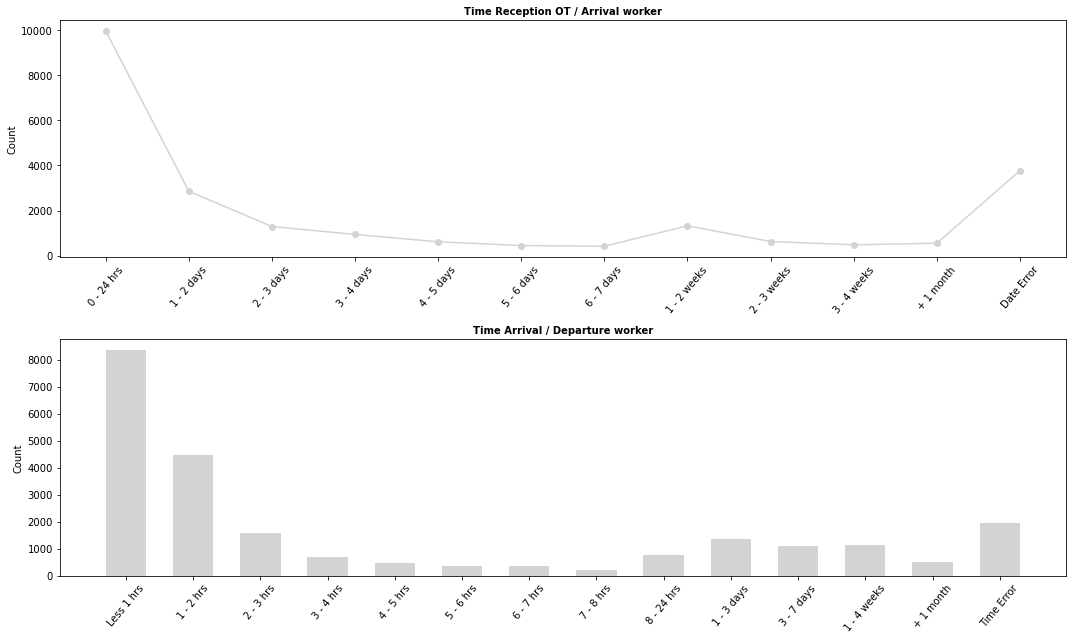

In [174]:
work_time(df2)

In [175]:
col_perc_values(df2['Interval Recep/Arrival'])

0 - 24 hrs     0.427724
Date Error     0.161880
1 - 2 days     0.122538
1 - 2 weeks    0.056884
2 - 3 days     0.055508
3 - 4 days     0.040416
2 - 3 weeks    0.026958
4 - 5 days     0.026486
+ 1 month      0.023648
3 - 4 weeks    0.020724
5 - 6 days     0.019305
6 - 7 days     0.017929
Name: Interval Recep/Arrival, dtype: float64

In [176]:
col_perc_values(df2['Interval Arrival/Landing'])

Less 1 hrs     0.358844
1 - 2 hrs      0.192106
Time Error     0.083971
2 - 3 hrs      0.067289
1 - 3 days     0.057787
1 - 4 weeks    0.049402
3 - 7 days     0.047597
8 - 24 hrs     0.032892
3 - 4 hrs      0.029237
+ 1 month      0.021842
4 - 5 hrs      0.019563
5 - 6 hrs      0.015952
6 - 7 hrs      0.014576
7 - 8 hrs      0.008943
Name: Interval Arrival/Landing, dtype: float64

<div class="alert alert-success" style="margin: 20px">
<b>Business Questions: </b><br>
2.- How long does it take to attend the requests? and how much time does a worker spend fixing the issues?
    
Based on the two plots from above we can conclude that:
    
a) 43% of the time the OT are attended under 24 hours and 55% under 2 days. On the other hand the ratio of OT that get cancelled or never are attended is 16% <br>
    
b) 36% of the time the problem is fixed in a matter of minutes (less than an hour) and 55% under two hours. The Time Error could indicate a manual error when the worker register the activity or that the activity was not solved by him, and this is equial to 8% <br>

    
</div>

### 3.- What are the most common type of failures or issues that require attention?

In [177]:
# Checking the proportion of Tipo de Falla (Type of Failure) again 
pd.DataFrame(df2['Tipo de Falla'].value_counts()/ df2['Tipo de Falla'].shape[0])

,Tipo de Falla
OTROOTRO,0.437269
SURTIDOR / DISPENSERACCESORIOS & FILTROSOTROS,0.152808
PROGRAMA MANTENCIÓN PREVENTIVASURTIDORES / ESTANQUESCHECK LIST,0.148121
SURTIDOR / DISPENSERCABEZALOTROS,0.068149
SURTIDOR / DISPENSERACCESORIOS & FILTROSPISTOLA,0.038954
...,...
SURTIDOR / DISPENSERELEMENTOSRETRACTIL,0.000043
SURTIDOR / DISPENSERCONTROL FLUJOVALVULA SOLENOIDE / DIGITAL,0.000043
SURTIDOR / DISPENSERMEDIDORVALVULA DE RETENCIÒN,0.000043
SURTIDOR / DISPENSERCABEZALCABLES ELECTRICOS,0.000043


Even though there are 66 types of failures, almost 50% of the data is labeled as OTROOTRO, which means "Other". If we want to extract real information about the issues behind each work order (OT), we need to analyze another columns.

Checking the data frame, there are two unstructured text columns which contain the details of each OT. Those are "Observación" and "Requerimiento"

In [178]:
# Observaciones - Observations
df2['Observación'][250]

'Cambio de destorcedor de 1" a boca n°2 de P. Diesel por estar con filtración. ( uso).\nCambio de pistola de 1" a boca n° 2 de P. Diesel por no cortar se sor automático. ( uso).\nEquipo queda operativo.  Cambio de destorcedor de 1" a boca n°2 de P. Diesel por estar con filtración. ( uso).\nCambio de pistola de 1" a boca n° 2 de P. Diesel por no cortar se sor automático. ( uso).\nEquipo queda operativo.'

In [179]:
# Requerimientos - Requirement 
df2['Requerimiento'][250]

'Area de Atención : Filtracion de combustible Solicitado por: Ximena Soto Fono: 33216340'

In [180]:
# Checking nulls again
df2[['Observación', 'Requerimiento']].isnull().mean()

Observación      0.060968
Requerimiento    0.000000
dtype: float64

In [181]:
# Checking the length of each of these two unstructured text columns 
print(f"Avg length of Obs: {(np.mean(df2['Observación'].apply(str).apply(len)))}")
print(f"Avg length of Req: {(np.mean(df2['Requerimiento'].apply(str).apply(len)))}")

Avg length of Obs: 315.93885974718376
Avg length of Req: 87.62107661879783


To find the most common types of failures, only the **"Observación"** column will be analyzed, since its average row length is greater than "Requerimiento" column and because it is the one written by the technicians at the end of their work, so it contains more detail of the work done.

In [182]:
# Creating a function to clean text

def word_cleaner(sent):
    import string,re
    from unidecode import unidecode
    text = str(sent).lower() 
    text = re.sub('\d+-\d+-\d+','',text)    # Delete dates DD-MM-YYYY y D-M-YY
    text = re.sub('\d+/\d+/\d+','',text)    # Delete dates DD/MM/YYYY y D/M/YY
    text = re.sub('\d+:\d+', '', text)      # Delete time HH:MM 
    text = re.sub('\S*@\S*\s?','',text)     # Delete emails
    text = re.sub(r'\d{7,9}','', text)      # Delete phone numbers
    text = re.sub('\[.*?¿!¡\]\%', '', text)   # Delete .*?¿!¡\°
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Delete extra punctuation
    text = re.sub('[%s]' % re.escape('°'), ' ', text)
    text = re.sub('[‘’“”…«»/]', '', text)   # Delete extra punctuation
    text = unidecode(text)                  # Text to unicode (ñ -> n)
    text = re.sub('\n', ' ', text)          # Delete line breaks
    text = re.sub(r'\s{2,}', ' ', text)     # Delete two or more blank spaces
    text = re.sub(r"^\s+", "", text, flags=re.UNICODE)      # Delete two or more blank spaces at beggining
    text = re.sub("^\s+|\s+$", "", text, flags=re.UNICODE)  # Delete two or more blank spaces at ending 
    return text 

In [183]:
print('Cambio de destorcedor de 1" a boca n°2 de P. Diesel por estar con filtración. ( uso).\nCambio de pistola de 1" a boca n° 2 de P. Diesel por no cortar se sor automático. ( uso).\nEquipo queda operativo.  Cambio de destorcedor de 1" a boca n°2 de P. Diesel por estar con filtración. ( uso).\nCambio de pistola de 1" a boca n° 2 de P. Diesel por no cortar se sor automático. ( uso).\nEquipo queda operativo.')

Cambio de destorcedor de 1" a boca n°2 de P. Diesel por estar con filtración. ( uso).
Cambio de pistola de 1" a boca n° 2 de P. Diesel por no cortar se sor automático. ( uso).
Equipo queda operativo.  Cambio de destorcedor de 1" a boca n°2 de P. Diesel por estar con filtración. ( uso).
Cambio de pistola de 1" a boca n° 2 de P. Diesel por no cortar se sor automático. ( uso).
Equipo queda operativo.


In [184]:
word_cleaner('Cambio de destorcedor de 1" a boca n°2 de P. Diesel por estar con filtración. ( uso).\nCambio de pistola de 1" a boca n° 2 de P. Diesel por no cortar se sor automático. ( uso).\nEquipo queda operativo.  Cambio de destorcedor de 1" a boca n°2 de P. Diesel por estar con filtración. ( uso).\nCambio de pistola de 1" a boca n° 2 de P. Diesel por no cortar se sor automático. ( uso).\nEquipo queda operativo.')

'cambio de destorcedor de 1 a boca n 2 de p diesel por estar con filtracion uso cambio de pistola de 1 a boca n 2 de p diesel por no cortar se sor automatico uso equipo queda operativo cambio de destorcedor de 1 a boca n 2 de p diesel por estar con filtracion uso cambio de pistola de 1 a boca n 2 de p diesel por no cortar se sor automatico uso equipo queda operativo'

In [185]:
# Creating a new DF based on this new function word_cleaner()

df3 = df2.copy()
for col in ['Observación','Requerimiento','Estacion','Tecnico Asignado','Técnico Cierre']:
    df3[col] = df3[col].apply(word_cleaner)

In [186]:
df3[['Observación','Requerimiento']].head()

,Observación,Requerimiento
0,nan,area de atencion surtidor no marca correctamen...
1,nan,area de atencion tanques enterrados no cuentan...
2,se cambia placa de tk 2 gas95 por placa que in...,area de atencion habilitar estanque de combust...
3,nan,area de atencion sin diesel solicitado por jmz...
4,nan,area de atencion pislota manquera cortada soli...


In [187]:
# Dealing with 'nan'/nulls and mixing both unstructured text columns into one

df3['TEXT_DETAIL'] = np.where(df3['Observación'] != 'nan', df3['Observación'], df3['Requerimiento'])
df3[['Observación','Requerimiento','TEXT_DETAIL']].head()

,Observación,Requerimiento,TEXT_DETAIL
0,nan,area de atencion surtidor no marca correctamen...,area de atencion surtidor no marca correctamen...
1,nan,area de atencion tanques enterrados no cuentan...,area de atencion tanques enterrados no cuentan...
2,se cambia placa de tk 2 gas95 por placa que in...,area de atencion habilitar estanque de combust...,se cambia placa de tk 2 gas95 por placa que in...
3,nan,area de atencion sin diesel solicitado por jmz...,area de atencion sin diesel solicitado por jmz...
4,nan,area de atencion pislota manquera cortada soli...,area de atencion pislota manquera cortada soli...


In [188]:
# Checking nulls again
print(f"Observación: {df3['Observación'][df3['Observación'] == 'nan'].count()}")
print(f"Requerimiento: {df3['Requerimiento'][df3['Requerimiento'] == 'nan'].count()}")
print(f"TEXT_DETAIL: {df3['TEXT_DETAIL'][df3['TEXT_DETAIL'] == 'nan'].count()}")

Observación: 1418
Requerimiento: 0
TEXT_DETAIL: 0


Because it is really har to get full knowledge by checking manual all the rows, the unsupervised learning algorithm LDA will be used to extract information from unstructured text. 

This will be done in the SECOND NOTEBOOK, where we will continue applying the CRISP-DM methodology, in this case steps number 4 and 5 which are modeling and evaluating.

To get a better quality results from the model, we will use the TEXT_DETAIL column, the one we created in the above df3 dataframe. For that reaso we will save the table in a pkl file its show below 

In [189]:
# Exporting df3 into a pkl file
df3.to_pickle('df_clean.pkl')

In [190]:
pd.read_pickle('df_clean.pkl').head()

,Recepción OT,Hora Recep.,OT,Estacion,Tipo Estación,Ubicación Técnica,Origen del Servicio,Region,Prioridad SGS,Prioridad Cliente,...,Departure,Day,N Day,Month,Hour,Time Reception/Arrival,Time Arrival/Departure,Interval Recep/Arrival,Interval Arrival/Landing,TEXT_DETAIL
0,2019-08-30,2021-05-04 17:18:00,3008190033,buses metropolitana,PUNTO INDUSTRIAL,2256194,Contrato Fuel System Enex,13°,Normal 24 Horas,Normal 24 Horas,...,NaT,Friday,30,AUG 19,17,NaN,NaN,Date Error,Time Error,area de atencion surtidor no marca correctamen...
1,2019-08-30,2021-05-04 17:17:00,3008190024,inversiones ingeriasur ltda,ESTACION DE SERVICIO,359,Contrato Fuel System Enex,9°,Normal 24 Horas,Normal 24 Horas,...,NaT,Friday,30,AUG 19,17,NaN,NaN,Date Error,Time Error,area de atencion tanques enterrados no cuentan...
2,2019-08-30,2021-05-04 16:52:00,2606190074,tingaro spa,ESTACION DE SERVICIO,553,Contrato Fuel System Enex,13°,Normal 48 Horas,Normal 48 Horas,...,2019-08-28 17:00:00,Friday,30,AUG 19,16,-65.0,1496.0,Date Error,+ 1 month,se cambia placa de tk 2 gas95 por placa que in...
3,2019-08-30,2021-05-04 16:49:00,3008190043,inversiones global limitada,ESTACION DE SERVICIO,660,Contrato Fuel System Enex,9°,Normal 24 Horas,Normal 24 Horas,...,NaT,Friday,30,AUG 19,16,NaN,NaN,Date Error,Time Error,area de atencion sin diesel solicitado por jmz...
4,2019-08-30,2021-05-04 16:48:00,2908190028,comercial antuco ltda,ESTACION DE SERVICIO,680,Contrato Fuel System Enex,5°,Normal 24 Horas,Normal 24 Horas,...,NaT,Friday,30,AUG 19,16,-2.0,NaN,Date Error,Time Error,area de atencion pislota manquera cortada soli...


**Next: Notebook N°2 - LDA AND TOPIC MODELING**